# TEORÍA GENERAL DEL MUESTREO

## Introducción

El objeto del muestreo es hacer inferencias de características cuantitativas sobre una población a partir de una muestra. Esto es posible si la muestra es como indican algunos autores _representativa_ de la población.

**¿Cuándo es representativa una muestra?**

Antes de responder, veamos la diferencia entre muestra y población:

* **Población:** Son cada unas de las variables que se definen sobre un universo. Mediante esta definición puede hacerse notar que puede existir más de una población asociada a un mismo universo.
* **Muestra:** Es una parte representativa de la población.

Bien, aceptemos que eso no dice mucho. Veamos la cosa con un ejemplo:

> Se tiene la información sobre todos los estudiantes de la UIS pero se desea trabajar con una muestra de ellos dado el volumen de datos (supongamos que es grande). Los datos son los siguientes:

In [3]:
load('Datos/estudiantes.RData')
ls() # Con esta función podemos revisar los objetos que tenemos en el área de trabajo

[1] "mystats"   "poblacion"

In [4]:
dim(poblacion) # Cuáles son las dimensiones de data.frame

[1] 24040    21

In [5]:
names(poblacion) # Los nombres de las variables del conjunto de datos

[1] "NUM_DOCUMENTO"      "SEXO_BIOLOGICO"     "ID_ESTADO_CIVIL"   
 [4] "AÑO.NACIMIENTO"     "EDAD"               "PAIS.NACIMIENTO"   
 [7] "REGIÓN"             "COD_PROG_SNIES"     "PROGRAMA"          
[10] "COD_ESTUDIANTE"     "SEDE"               "ESTADO"            
[13] "VIGENTE"            "COD_FAC"            "FACULTAD"          
[16] "COD_ESC"            "ESCUELA_DEP"        "METODOLOGÍA"       
[19] "PROGRAMA.TIPO"      "NIVEL.ACADEMICO"    "NIVEL.DE.FORMACION"

In [6]:
# Seleccionemos sólo unas variables para efectos del ejercicio
edad<-data.frame(codigo=poblacion$COD_ESTUDIANTE, edad=poblacion$EDAD, facultad=poblacion$FACULTAD)

In [7]:
head(edad); tail(edad) # Primeras y últimas observaciones de la tabla

codigo,edad,facultad
2158108,30,CIENCIAS
2188261,26,CIENCIAS
2168284,30,CIENCIAS
2168283,28,CIENCIAS
2178275,28,CIENCIAS
2188259,28,CIENCIAS


,codigo,edad,facultad
24035,2172579,18,C. HUMANAS
24036,2121969,38,C. HUMANAS
24037,2131294,27,SALUD
24038,2172624,19,C. HUMANAS
24039,2143435,28,C. HUMANAS
24040,2170842,19,C. HUMANAS


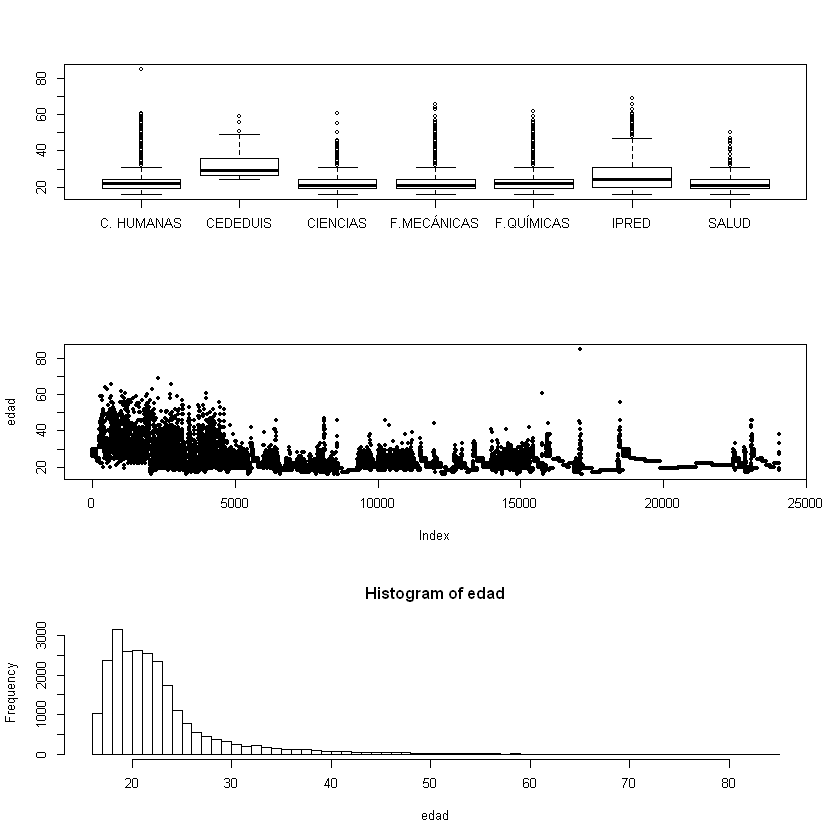

In [8]:
# Algunas gráficas para apreciar la dispersión de los datos:
par(mfrow=c(3,1))
with(edad, plot(facultad,edad))
with(edad, plot(edad, pch = 20))
with(edad, hist(edad, nclass = 50))
par(mfrow=c(1,1))

Gráficamente, tenemos representada allí las edades de la población estudiantil de la UIS; toda ella, sin distinción de carrera, nivel de formación o cualquier otro tipo de agrupamiento. Seleccionemos una muestra. Empecemos con una de tamaño pequeño:

In [9]:
n<-30
muestra1<- sample(1:nrow(edad),size=n,replace=FALSE)
head(muestra1) 

[1] 17638 15500 11077  5691  6596 23971

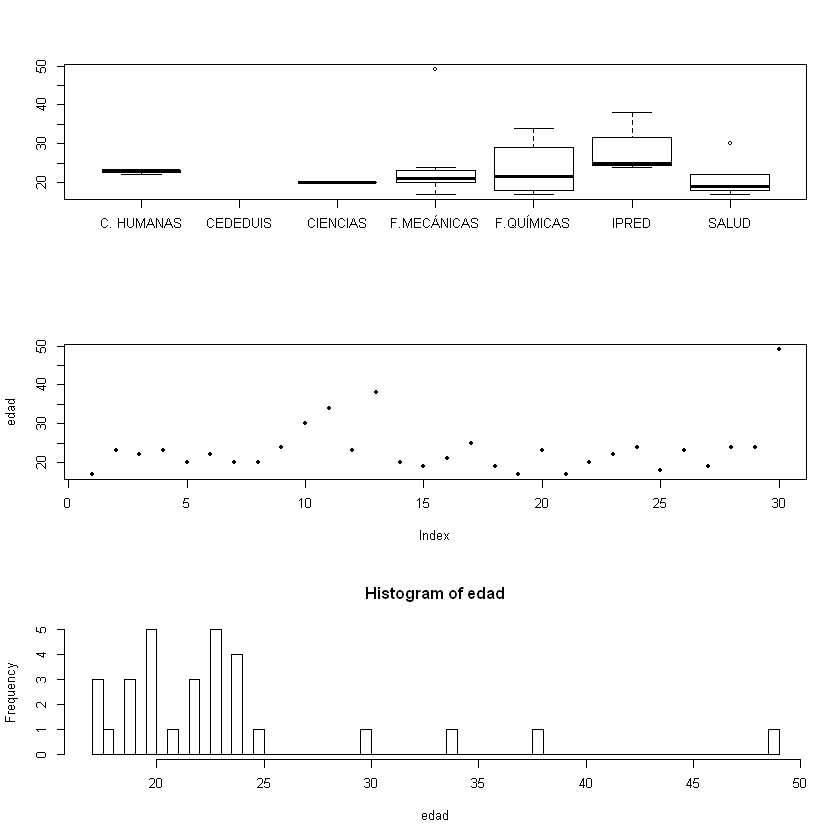

In [10]:
par(mfrow=c(3,1))
with(edad[muestra1,], plot(facultad,edad))
with(edad[muestra1,], plot(edad, pch = 20))
with(edad[muestra1,], hist(edad, nclass = 50))
par(mfrow=c(1,1))

Cambiemos el tamaño de la muestra y miremos el comportamiento:

In [11]:
n2<-200
muestra2<- sample(1:nrow(edad),size=n2,replace=FALSE)
head(muestra2)

[1] 15453  2591  6997  2517  8495 19828

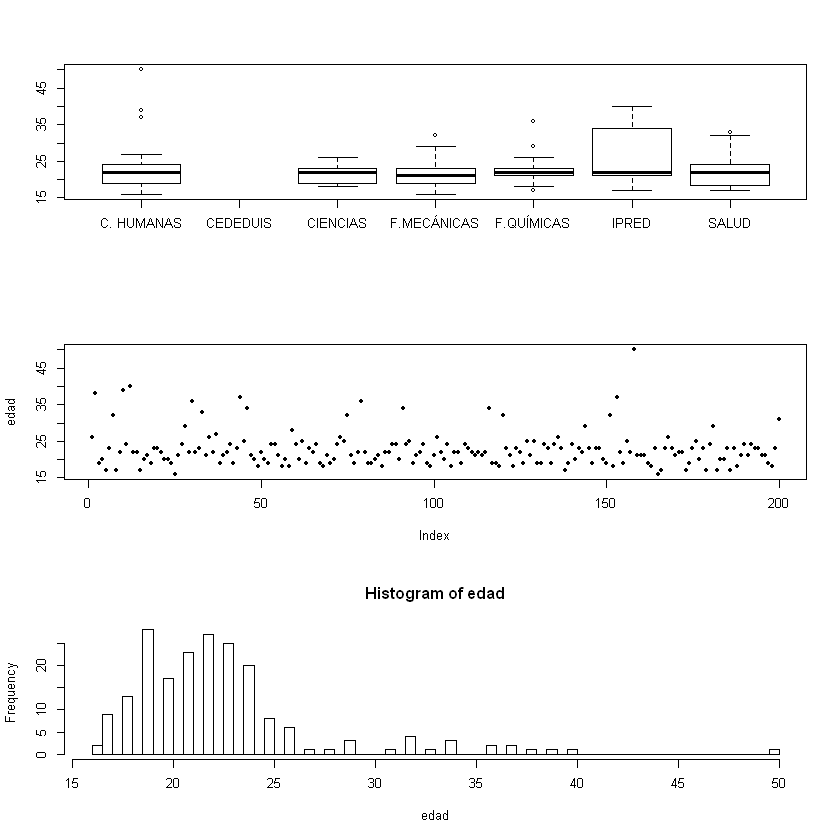

In [12]:
par(mfrow=c(3,1))
with(edad[muestra2,], plot(facultad,edad))
with(edad[muestra2,], plot(edad, pch = 20))
with(edad[muestra2,], hist(edad, nclass = 50))
par(mfrow=c(1,1))

Aparentemente, entre más grande la muestra, más se parece a la población; sin embargo, el muestreo está asociado a un nivel de confianza y un nivel de error que son, al final, los que ayudan a determinar el tamaño adecuado de la muestra.

Pero, veamos si las muestras que hemos construido tiene algún parecido con la población. Para ellos, calculemos algunas medidas:

In [13]:
mystats <- function(x, na.omit=FALSE){
  if (na.omit)
    x <- x[!is.na(x)]
  m <- mean(x)
  n <- length(x)
  s <- sd(x)
  skew <- sum((x-m)^3/s^3)/n
  kurt <- sum((x-m)^4/s^4)/n - 3
  return(c("tamaño"=n, "media"=m, "desviación estándar"=s, "simetría"=skew, "kurtosis"=kurt))
}

In [14]:
pop<-round(mystats(edad[,'edad']),1)
m1<-round(mystats(edad[muestra1,'edad']),1)
m2<-round(mystats(edad[muestra2,'edad']),1)
data.frame(pop,m1,m2)

,pop,m1,m2
tamaño,24040.0,30.0,200.0
media,23.0,23.3,22.6
desviación estándar,5.7,6.7,4.9
simetría,2.4,2.2,2.1
kurtosis,8.2,5.2,6.2


Antes de avanzar, respondamos algunas preguntas
* ¿Qué se aprecia en los resultados?
* ¿Qué diferencias y similitudes se puden ver?
* ¿Qué se podría hacer?

Podría decirse que los valores son muy parecidos, que la muestra pequeña y la grande son bastante parecidas a la población y, por inducción, que es representativa. Sin embargo, dependiendo de los características de la población, se requiere de un adecuado diseño más complejo de la muestra, empezando por seleccionar el tamaño adecuado.

## Algunos conceptos básicos:

Veamos algunas definiciones que serán básicas en la comprensión del muestreo:

* **Universo:** Es un conjunto finito o infinito de animales, seres, cosas, etc. En términos de esta definición puede hablarse de un universo de individuo, animales, vehículos, etc.
* **Población:** Son cada unas de las variables que se definen sobre un universo. Mediante esta definición puede hacerse notar que puede existir más de una población asociada a un mismo universo.

* **Unidades Estadísticas:** Son requeridas por el diseñador, por una parte para saber cuál es la estrategia a seguir para la medición y, por otra, pensar en la estructura del marco de referencia de las unidades a ser estudiadas. Estas unidades son: la de investigación, análisis, observación y de muestreo.
> * **Unidad de Investigación:** Esta se refiere a la que contiene las partes que se van a analizar. Algunos ejemplos aclaran este concepto. En la encuesta de hogares para el estudio de la fuerza de trabajo que realiza el Instituto Nacional de Estadística, el motivo de la investigación es el hogar el cual contiene las unidades a examinar, es decir las, las personas. El estudio antropométrico que realiza Fundacredesa la unidad a investigar es el individuo, el cual contiene las partes del cuerpo que se van a analizar, mientras que en estudios sobre el sector industrial, la unidad de investigación esta dada por el establecimiento.

> * **Unidad de Análisis:** Comprende la unidad que se analiza, vale decir, de la que se busca la información y su naturaleza depende de los objetivos del estudio. Esta unidad puede ser el hogar, las partes del cuerpo de las personas, la granja, el establecimiento, etc. Las unidades de análisis reciben frecuentemente el nombre de “Elementos de la Población”
> * **Unidad de Observación:** Se denomina con este nombre a la unidad a través de la cual se obtiene la información, pudiendo o no coincidir con el elemento. Por ejemplo cada uno de los miembros del hogar puede constituir un elemento de la población y sin embargo ser sólo uno de ellos, por ejemplo, el jefe del hogar, quien proporcione la información requerida. Este último por tanto, constituirá la unidad de observación, también llamada unidad respondiente.
> * **Unidad de Muestreo:** Será un individuo o conjunto de individuos que se seleccionan en una única extracción. Como requisito se exige que el elemento o el grupo de elementos que componen el estudio reúnan las características de la población.

* **Muestreo:** El procedimiento mediante el cual obtenemos una o mas muestras recibe el nombre de muestreo. Obtener una muestra adecuada significa lograr una versión simplificada de la población, que reproduzca de algún modo sus rasgos básicos en términos de variación y localización.
* **Error de Muestreo:** El error que se comete debido al hecho de que se obtienen conclusiones sobre cierta realidad a partir de la observación de sólo una parte de ella.
* **Marco del Muestreo:** El conjunto de todas las unidades muestreadas consideradas.
* **Variables:** Rasgos o magnitudes que varían de unos individuos a otros. Se refiere a las características particulares que podría presentarse en uno o varios elementos de los que componen la población estudiada.
* **Características Poblacionales (parámetros):** Las más habituales como la media poblacional, el total poblacional y la proporción poblacional, entre otras características de la población se podrían citar la varianza, la mediana, la moda, entre otros.
* **Estadísticos:** Son funciones de los valores muestrales. Algunos de ellos se utilizan para estimar los parámetros (en general desconocidos), partiendo de los datos recabados en una investigación por muestreo

### ¿Por qué muestrear?

Esta pregunta, aunque simple, es completamente válida. Existen muchas razones para trabajar con muestras y no censar. Las más claras son:

* Resulta mas económica la muestra que una enumeración completa.
* El tiempo para obtener los resultados a través de una muestra es sustancialmente mas pequeño que para obtenerlo por la vía del censo, si el tamaño del universo es grande.
* La calidad de la información muestral es superior, ya que se puede concentrar más la atención en los casos individuales de la muestra y ejercer mayor control sobre ellos que una operación censal.
* Cuando el proceso de medida o examen de las características de cada elemento sea destructivo o disminuya su valor, por ejemplo, si se desea determinar la vida útil promedio de bombillos.
* Cuando la población sea considerada como infinita o tan grande que el tratamiento total exceda las posibilidades del investigador.
* Cuando los elementos de la población sean suficientemente homogéneos. Un buen ejemplo de esto lo constituye un análisis de sangre, ya que los componentes de la sangre son los mismos en cualquier  parte del cuerpo donde se encuentre ubicada.

## Tipos de Muestreo

No hay un único tipo de muestreo. Según las características de los individuos que conforman la población. Veamos algunos:

### Muestreo Aleatorio Simple (MAS)

Consiste en la selección de $n$ elementos entre los $N$ constituyen la población, de modo que todas las muestras posibles de tamaño $n$ (tantas como combinaciones de $N$ elementos de $n$ en $n$) tengan la misma probabilidad $\frac{1}{\left( \begin{smallmatrix} N \\ n \end{smallmatrix} \right)}$ de ser obtenidas.

Dado lo anterior, la probabilidad de cada elemento se calcula así:

$$
\frac{1}{\left( \begin{smallmatrix} N \\ n \end{smallmatrix} \right)} \left( \begin{smallmatrix} N - 1 \\ n - 1\end{smallmatrix} \right) = \left( \begin{smallmatrix} n \\ N \end{smallmatrix} \right)
$$


El MAS tiene sus propios parámetros:

**Media Poblacional:**
$$
\overline{Y} = \overline{y} = \sum \frac{y_{1}}{n}
$$
**Total Poblacional:**
$$
\widehat{Y} = N \overline{y}
$$
**Varianza Poblacional:**
$$
\sigma(\overline{y}) = \frac{s^{2}}{n} \frac{N-n}{N}
$$
**Varianza Total:**
$$
\sigma(\widehat{Y}) = \frac{N^{2}s^{2}}{n} \frac{N-n}{N}
$$


### ¿cuándo se realiza el muestreo aleatorio simple?

El MAS se realiza cuando la población no se encuentra subdividida o sus subdivisiones no son de importancia para el estudio.

#### Ejemplo

Sigamos usando como base la tabla con la información de la edad de la población de estudiantes UIS:

In [15]:
head(edad)

codigo,edad,facultad
2158108,30,CIENCIAS
2188261,26,CIENCIAS
2168284,30,CIENCIAS
2168283,28,CIENCIAS
2178275,28,CIENCIAS
2188259,28,CIENCIAS


Vamos a obviar la variable facultad, para los propósitos del estudio (supuesto) no nos interesa, sólo es de interés analizar la edad de los estudiantes sin considerar ningún tipo de agrupamiento. En ese aspecto, cualquier muestra que seleccionemos será un MAS. En la sección anterior habíamos tomado dos muestras para ilustrar, tomemos una muestra más y comparemos:

In [16]:
n3<-500
muestra3<- sample(1:nrow(edad),size=n3,replace=FALSE)
head(muestra3)

[1]  2797 19939  2018 19960  5426  6710

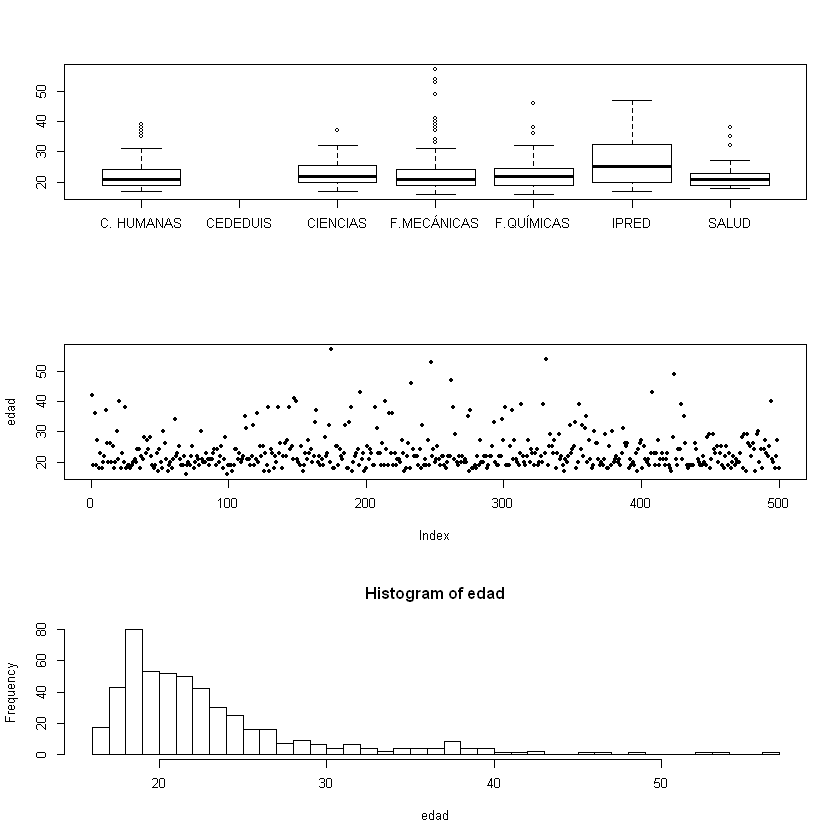

In [17]:
par(mfrow=c(3,1))
with(edad[muestra3,], plot(facultad,edad))
with(edad[muestra3,], plot(edad, pch = 20))
with(edad[muestra3,], hist(edad, nclass = 50))
par(mfrow=c(1,1))

In [18]:
pop<-round(mystats(edad[,'edad']),1)
m1<-round(mystats(edad[muestra1,'edad']),1)
m2<-round(mystats(edad[muestra2,'edad']),1)
m3<-round(mystats(edad[muestra3,'edad']),1)
data.frame(pop,m1,m2,m3)

,pop,m1,m2,m3
tamaño,24040.0,30.0,200.0,500.0
media,23.0,23.3,22.6,23.3
desviación estándar,5.7,6.7,4.9,6.1
simetría,2.4,2.2,2.1,2.1
kurtosis,8.2,5.2,6.2,5.5


Comparemos todos los gráficos. Como hemos establecido que no es de nuestro interés la variable _facultad_ no consideraremos los diagramas de caja para cada facultad

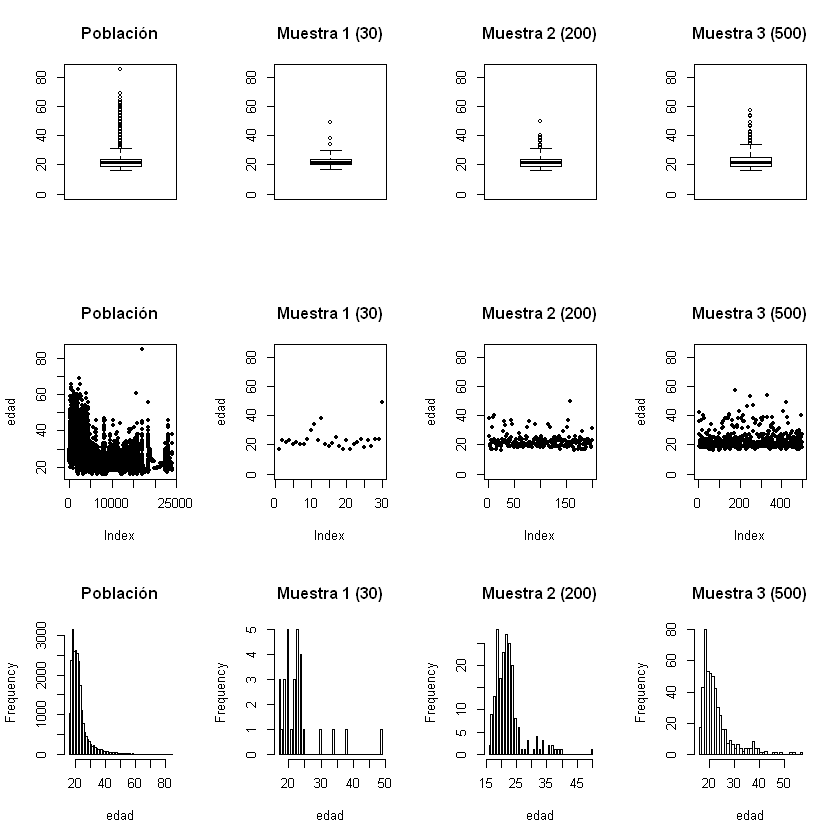

In [19]:
par(mfrow=c(3,4))
with(edad, boxplot(edad, main = 'Población', ylim=c(0,85)))
with(edad[muestra1,], boxplot(edad, main = 'Muestra 1 (30)', ylim=c(0,85)))
with(edad[muestra2,], boxplot(edad, main = 'Muestra 2 (200)', ylim=c(0,85)))
with(edad[muestra3,], boxplot(edad, main = 'Muestra 3 (500)', ylim=c(0,85)))
with(edad, plot(edad, pch = 20, main = 'Población'))
with(edad[muestra1,], plot(edad, pch = 20, main = 'Muestra 1 (30)', ylim=c(0,85)))
with(edad[muestra2,], plot(edad, pch = 20, main = 'Muestra 2 (200)', ylim=c(0,85)))
with(edad[muestra3,], plot(edad, pch = 20, main = 'Muestra 3 (500)', ylim=c(0,85)))
with(edad, hist(edad, nclass = 50, main = 'Población'))
with(edad[muestra1,], hist(edad, nclass = 50, main = 'Muestra 1 (30)'))
with(edad[muestra2,], hist(edad, nclass = 50, main = 'Muestra 2 (200)'))
with(edad[muestra3,], hist(edad, nclass = 50, main = 'Muestra 3 (500)'))
par(mfrow=c(1,1))

Como observamos, el tamaño de la muestra es determinante en su 'representatividad'. De ello hablaremos más adelante, por el momento sigamos viendo otros tipos de muestreo)

### Muestreo Estratificado

En el MAS no hacemos distinción si la población se encuentra dividida en _subpoblaciones_ o estratos; ahora, si tomamos en cuenta esta característica (en el ejemplo que hemos venido desarrollando son las facultades) es necesario construir la muestra de manera tal que contenga elementos de cada estrato. Estas _subpoblaciones_ no se sobreponen y, juntas, forman la población total. Entonces tenemos:

$$
N_{1} + N_{2} + \dots + N_{L} = \sum_{i=1}^{L} N_{i} = N
$$

Una vez que hayamos identificado los estratos, sacamos una muestra de cada uno, esto es equivalente a realizar un MAS en cada uno de los estratos y se conoce como Muestreo Estratificado. Sigamos con el ejemplo de la edad de los estudiantes.

En primer lugar, tenemos que traer dos librerías que nos van a soportar algunas funciones:

In [20]:
library(magrittr) # Permite leer la función %>%
library(dplyr) # Contiene la función select


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Instaladas y llamadas las librerías, vamos a identificar los estratos:

In [21]:
Estratos<- edad %>%
  select(facultad,edad) %>%
  group_by(facultad) %>%
  summarise(n=n(),
            s=sd(edad)) %>%
  mutate(p=n/sum(n))

Estratos

facultad,n,s,p
C. HUMANAS,4115,6.104970,0.1711730449
CEDEDUIS,19,11.373767,0.0007903494
CIENCIAS,1661,5.008459,0.0690931780
F.MECÁNICAS,8982,4.771159,0.3736272879
F.QUÍMICAS,4259,5.158950,0.1771630616
IPRED,3129,7.855062,0.1301580699
SALUD,1875,4.124805,0.0779950083


Es importante notar la distribución de frecuencias en los estratos. Estas nos permitirán seleccionar adecuadamente cada muestra. Vamos a usar los tamaños previos: `30`, `200` y `500`:

In [22]:
library('SamplingUtil') # Contiene la función nstrata

In [23]:
nsizeProp30<-nstrata(n=30,wh=Estratos[,4],method="proportional")
nsizeProp200<-nstrata(n=200,wh=Estratos[,4],method="proportional")
nsizeProp500<-nstrata(n=500,wh=Estratos[,4],method="proportional")

In [24]:
data.frame(fac=Estratos$facultad,nsizeProp30,nsizeProp200,nsizeProp500)

fac,p,p.1,p.2
C. HUMANAS,6,35,86
CEDEDUIS,1,1,1
CIENCIAS,3,14,35
F.MECÁNICAS,12,75,187
F.QUÍMICAS,6,36,89
IPRED,4,27,66
SALUD,3,16,39


Las proporciones se mantienen de manera relativa. Podemos notar que los valores son redondeados hacia el entero superior por lo que el tamaño de la muestra será mayor en este caso, si se compara con el MAS. La selección de la muestra se hace, entonces, dento de cada estrato:

In [25]:
nhumanas30<-6
muestrahumanas30<- sample(1:nrow(edad[edad$facultad=='C. HUMANAS',]),size=nhumanas30,replace=FALSE)
muestrahumanas30

[1] 1934 1786 1508 1456  795   25

In [26]:
ncedeuis30<-1
muestracedeuis30<- sample(1:nrow(edad[edad$facultad=='CEDEDUIS',]),size=ncedeuis30,replace=FALSE)
muestracedeuis30

[1] 19

In [27]:
nciencias30<-3
muestraciencias30<- sample(1:nrow(edad[edad$facultad=='CIENCIAS',]),size=nciencias30,replace=FALSE)
muestraciencias30

[1] 872 466 142

In [28]:
nmecanicas30<-12
muestramecanicas30<- sample(1:nrow(edad[edad$facultad=='F.MECÁNICAS',]),size=nmecanicas30,replace=FALSE)
muestramecanicas30

[1] 1156 2843 3358 1724 5328 7753 1461  119 4954 5660 8410 6210

In [29]:
nquimicas30<-6
muestraquimicas30<- sample(1:nrow(edad[edad$facultad=='F.QUÍMICAS',]),size=nquimicas30,replace=FALSE)
muestraquimicas30

[1]  293  759 3025 2543 2242 3350

In [30]:
nipred30<-4
muestraipred30<- sample(1:nrow(edad[edad$facultad=='IPRED',]),size=nipred30,replace=FALSE)
muestraipred30

[1] 2703 1943 1089 1616

In [31]:
nsalud30<-3
muestrasalud30<- sample(1:nrow(edad[edad$facultad=='SALUD',]),size=nsalud30,replace=FALSE)
muestrasalud30

[1] 1821  863  261

Construyamos un vector que nos permita seleccionar la muestra:

In [32]:
mestrato30<-c(muestrahumanas30,muestracedeuis30,muestraciencias30,muestramecanicas30,muestraquimicas30,muestraipred30,muestrasalud30)

Y unas gráficas que nos permitan comparar:

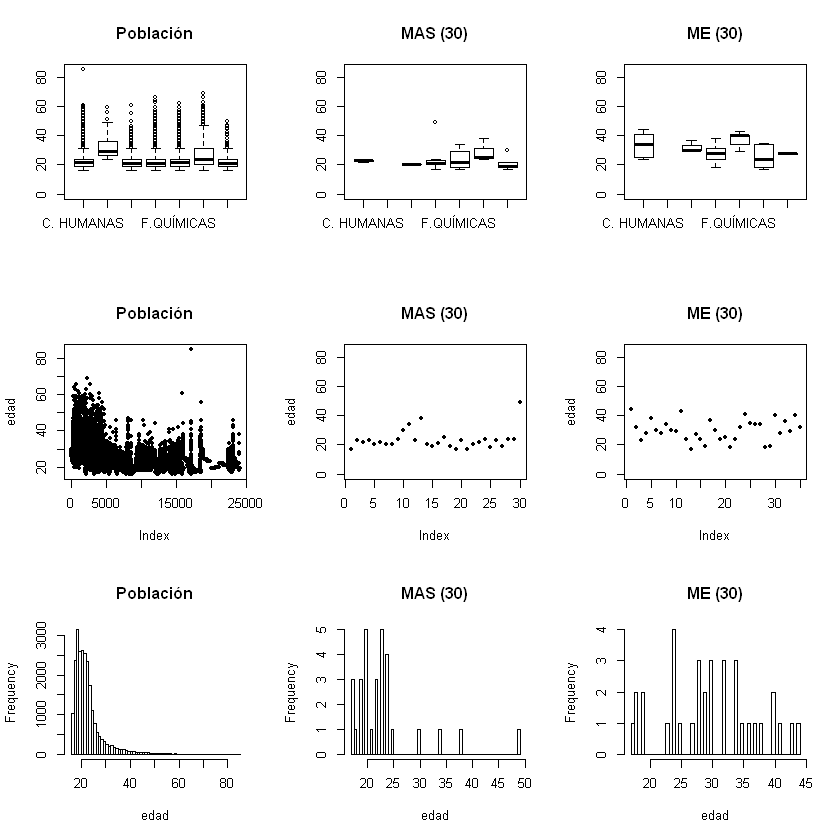

In [33]:
par(mfrow=c(3,3))
with(edad, plot(facultad,edad, main = 'Población', ylim=c(0,85)))
with(edad[muestra1,], plot(facultad,edad, main = 'MAS (30)', ylim=c(0,85)))
with(edad[mestrato30,], plot(facultad,edad, main = 'ME (30)', ylim=c(0,85)))

with(edad, plot(edad, pch = 20, main = 'Población'))
with(edad[muestra1,], plot(edad, pch = 20, main = 'MAS (30)', ylim=c(0,85)))
with(edad[mestrato30,], plot(edad, pch = 20, main = 'ME (30)', ylim=c(0,85)))

with(edad, hist(edad, nclass = 50, main = 'Población'))
with(edad[muestra1,], hist(edad, nclass = 50, main = 'MAS (30)'))
with(edad[mestrato30,], hist(edad, nclass = 50, main = 'ME (30)'))

par(mfrow=c(1,1))

* ¿Qué diferencias observamos?
* ¿A qué se deberán estas diferencias?
* ¿Cambiará en algo si ampliamos la muestra?

## Muestreo Sistemático

El muestro sistemático consiste en tomar alestoriamente un cierto númoer $i$ de las primeras $k$ unidades que designara en una lista o población de $N$ elementos al primero que va a formar parte de la muestra.

Luego, de manera casi rígida o sistemática, se va tomando el elemento $i+k$ que está $k$ lugares del i-ésimo en la lista; el $i+2k$ que está a $2k$ lugares y así sucesivamente hasta que se agoten los elementos disponibles en la lista

In [34]:
library(SamplingUtil) # librería empleada para muestreo sistemático:

In [35]:
# construyamos una muestra sistemática de tamaño 30:
msis30<- sys.sample(N=nrow(edad),n=30)
msis30

[1]   296  1097  1898  2699  3500  4301  5102  5903  6704  7505  8306  9107
[13]  9908 10709 11510 12311 13112 13913 14714 15515 16316 17117 17918 18719
[25] 19520 20321 21122 21923 22724 23525

In [40]:
# construyamos una muestra sistemática de tamaño 200:
msis200<- sys.sample(N=nrow(edad),n=200)
head(msis200,10);tail(msis200,10)

[1]   58  178  298  418  538  658  778  898 1018 1138

[1] 22858 22978 23098 23218 23338 23458 23578 23698 23818 23938

In [41]:
# construyamos una muestra sistemática de tamaño 500:
msis500<- sys.sample(N=nrow(edad),n=500)
head(msis500,10);tail(msis500,10)

[1]  23  71 119 167 215 263 311 359 407 455

[1] 23543 23591 23639 23687 23735 23783 23831 23879 23927 23975

In [42]:
# Ahora extraemos la muestra:
m30sis<- edad[msis30, ]
head(m30sis)

,codigo,edad,facultad
296,2178774,31,F.QUÍMICAS
1097,2188584,35,F.QUÍMICAS
1898,2188465,37,F.MECÁNICAS
2699,2187583,21,IPRED
3500,2187523,23,IPRED
4301,2186291,44,IPRED


In [43]:
m200sis<- edad[msis200, ]
head(m200sis)

,codigo,edad,facultad
58,2169097,26,F.MECÁNICAS
178,2188805,25,F.MECÁNICAS
298,2178119,32,CIENCIAS
418,2188812,45,F.MECÁNICAS
538,2188058,32,F.MECÁNICAS
658,2087747,33,F.MECÁNICAS


In [44]:
m500sis<- edad[msis500, ]
head(m500sis)

,codigo,edad,facultad
23,2158775,29,CIENCIAS
71,2168300,27,F.MECÁNICAS
119,2148687,30,F.MECÁNICAS
167,2188192,25,CIENCIAS
215,2188274,24,F.MECÁNICAS
263,2169111,41,CIENCIAS


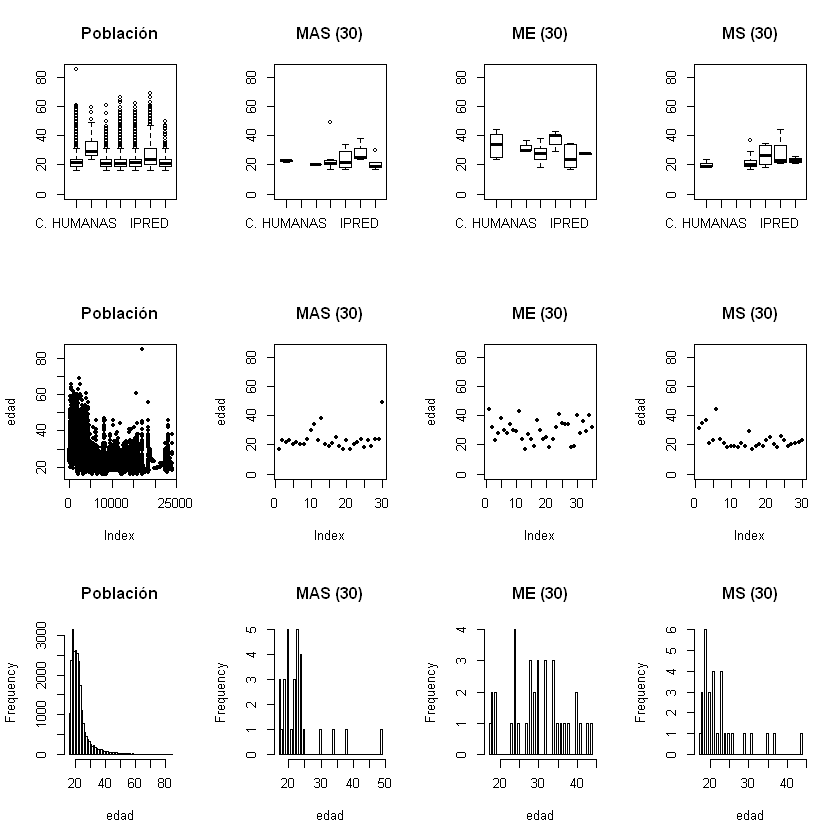

In [46]:
# Y las gráficas
par(mfrow=c(3,4))
with(edad, plot(facultad,edad, main = 'Población', ylim=c(0,85)))
with(edad[muestra1,], plot(facultad,edad, main = 'MAS (30)', ylim=c(0,85)))
with(edad[mestrato30,], plot(facultad,edad, main = 'ME (30)', ylim=c(0,85)))
with(edad[msis30,], plot(facultad,edad, main = 'MS (30)', ylim=c(0,85)))

with(edad, plot(edad, pch = 20, main = 'Población'))
with(edad[muestra1,], plot(edad, pch = 20, main = 'MAS (30)', ylim=c(0,85)))
with(edad[mestrato30,], plot(edad, pch = 20, main = 'ME (30)', ylim=c(0,85)))
with(edad[msis30,], plot(edad, pch = 20, main = 'MS (30)', ylim=c(0,85)))

with(edad, hist(edad, nclass = 50, main = 'Población'))
with(edad[muestra1,], hist(edad, nclass = 50, main = 'MAS (30)'))
with(edad[mestrato30,], hist(edad, nclass = 50, main = 'ME (30)'))
with(edad[msis30,], hist(edad, nclass = 50, main = 'MS (30)'))

par(mfrow=c(1,1))

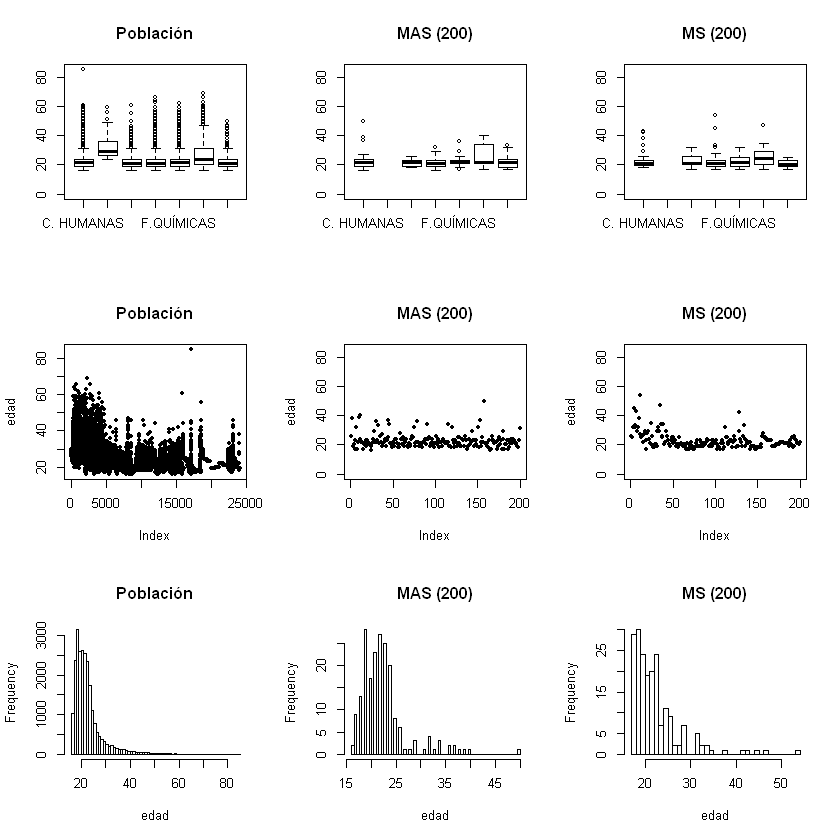

In [49]:
# Con la muestra 200
par(mfrow=c(3,3))
with(edad, plot(facultad,edad, main = 'Población', ylim=c(0,85)))
with(edad[muestra2,], plot(facultad,edad, main = 'MAS (200)', ylim=c(0,85)))
with(edad[msis200,], plot(facultad,edad, main = 'MS (200)', ylim=c(0,85)))

with(edad, plot(edad, pch = 20, main = 'Población'))
with(edad[muestra2,], plot(edad, pch = 20, main = 'MAS (200)', ylim=c(0,85)))
with(edad[msis200,], plot(edad, pch = 20, main = 'MS (200)', ylim=c(0,85)))

with(edad, hist(edad, nclass = 50, main = 'Población'))
with(edad[muestra2,], hist(edad, nclass = 50, main = 'MAS (200)'))
with(edad[msis200,], hist(edad, nclass = 50, main = 'MS (200)'))

par(mfrow=c(1,1))

## Ejercicio

En el siguiente enlace encontrará el script correspondiente al ejercicio propuesto en clase:
https://github.com/karlosmantilla/Muestreo/blob/master/Datos/Muestreo3.R